# NLP  Morderno em Python

Este notebook foi feito para aprendizagem de NLP seguindo o  passo a passo do Patrick Harrison, Director of AI Engineering @ S&P Global, disponível [aqui](https://github.com/skipgram/modern-nlp-in-python-2019/blob/master/notebooks/Modern_NLP_in_Python.ipynb). Este notebook é provido como está e não representa nenhuma garantia. Além disso todo credito deve ser dado ao Patrick Harrison e não a mim.
Você pode ver as explicações dele da versão de 2016 no [Youtube](https://www.youtube.com/watch?v=6zm9NC9uRkk)

# 1. Tópicos:

Este tutorial apresenta um pipeline de processamento de ciência de dados e linguagem natural de ponta a ponta, começando com dados brutos e executando a preparação, modelagem, visualização e análise dos dados. Vamos abordar os seguintes pontos:

* Um tour pelo conjunto de dados
* Introdução ao processamento de texto com spaCy
* Modelagem automática de frases
* Modelagem de tópicos com LDA
* Visualizando modelos de tópicos com pyLDAvis
* Modelos de vetores de palavras com word2vec
* Visualizando o word2vec com t-SNE
* Categorização de texto (classificação) com o modelo textcat do spaCy
* Vetores de palavras contextuais com spaCy Pytorch Transformers
* ... e podemos até aprender uma coisa ou duas sobre Python ao longo do caminho.

Vamos começar!

# 2. O conjunto de dados Yelp

O conjunto de dados Yelp é um conjunto de dados publicado pelo Yelp, serviço de análise de negócios, para fins acadêmicos e educacionais. É um ótimo conjunto de dados do Yelp para demonstrações de aprendizado de máquina e processamento de linguagem natural, porque é grande (mas não tão grande que você precisa de seu próprio data center para processá-lo), bem conectado e qualquer pessoa pode se relacionar com ele - é sobre comida, afinal!

Nota: Se você deseja executar este notebook de forma interativa em sua máquina local, precisará fazer o download de sua própria cópia do conjunto de dados do Yelp. Se você estiver revisando uma cópia estática do notebook online, poderá pular esta etapa. Veja como obter o conjunto de dados:

* Visite a página do conjunto de dados do Yelp [aqui](https://www.yelp.com/dataset)
* Clique em "Download Dataset"
* Leia, concorde e respeite os termos de uso do Yelp!
* O conjunto de dados é baixado como um arquivo .tar; desarquivar
* Coloque os arquivos do conjunto de dados não compactados (business.json etc.) em um diretório chamado yelp_dataset
* Coloque o diretório yelp_dataset no diretório de dados na pasta do projeto Modern NLP in Python

É isso aí! Você está pronto para rodar.

A iteração atual do conjunto de dados do Yelp (a partir desta demonstração) consiste nos seguintes dados:


* 209 mil negócios
* 8 milhões de avaliações de usuários
* 4,5GB comprimidos

<font color='red'>ATENÇÃO: se fizer o download dos dados compactados terá que fazer o unzip algumas vezes, se atente para como você vai organizar as pastas pois será importante na hora de passar o caminho para carregar os aquivos</font>

> atualizado 08/04/2020  

Ao focar apenas nos restaurantes, existem aproximadamente 59 mil restaurantes com aproximadamente 4,2 milhões de comentários de usuários escritos sobre eles.

Os dados são fornecidos em um punhado de arquivos no formato .json. Usaremos os seguintes arquivos para nossa demonstração:

* **business.json** - os registros para empresas individuais

* **review.json** - os registros para comentários que os usuários escreveram sobre empresas

Os arquivos são arquivos de texto (UTF-8) com um objeto json por linha, cada um correspondendo a um registro de dados individual. Vamos dar uma olhada em alguns exemplos.

In [1]:
import os

#Lembre-se que o caminho onde você salvou o dataset pode ser diferente do meu, 
#então ajuste o comando abaixo de acordo coma  estrutura das suas pastas
data_directory = os.path.join('yelp_dataset','_yelp_dataset')

businesses_filepath = os.path.join(data_directory,'yelp_academic_dataset_business.json')

with open(businesses_filepath) as f:
    first_business_record = f.readline() 

print(first_business_record)

{"business_id":"f9NumwFMBDn751xgFiRbNA","name":"The Range At Lake Norman","address":"10913 Bailey Rd","city":"Cornelius","state":"NC","postal_code":"28031","latitude":35.4627242,"longitude":-80.8526119,"stars":3.5,"review_count":36,"is_open":1,"attributes":{"BusinessAcceptsCreditCards":"True","BikeParking":"True","GoodForKids":"False","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}","ByAppointmentOnly":"False","RestaurantsPriceRange2":"3"},"categories":"Active Life, Gun\/Rifle Ranges, Guns & Ammo, Shopping","hours":{"Monday":"10:0-18:0","Tuesday":"11:0-20:0","Wednesday":"10:0-18:0","Thursday":"11:0-20:0","Friday":"11:0-20:0","Saturday":"11:0-20:0","Sunday":"13:0-18:0"}}



Os registros comerciais consistem em pares de *chave-valor* que contêm informações sobre os negócios específicos. Alguns atributos em que estaremos interessados nesta demonstração incluem:

* **business_id** - identificador exclusivo para empresas
* **categories** - uma lista delimitada por vírgula que contém os valores de categoria relevantes das empresas

O atributo de categorias é de interesse especial. Esta demonstração será focada em restaurantes, indicados pela presença da tag Restaurantes na lista de categorias. Além disso, a lista de categorias pode conter informações mais detalhadas sobre restaurantes, como o tipo de comida que eles servem.

Os registros de revisão são armazenados de maneira semelhante - pares de chave e valor contendo informações sobre as revisões.

In [2]:
review_json_filepath = os.path.join(data_directory, 'yelp_academic_dataset_review.json')

with open(review_json_filepath) as f:
    first_review_record = f.readline()
    
print(first_review_record)

{"review_id":"xQY8N_XvtGbearJ5X4QryQ","user_id":"OwjRMXRC0KyPrIlcjaXeFQ","business_id":"-MhfebM0QIsKt87iDN-FNw","stars":2.0,"useful":5,"funny":0,"cool":0,"text":"As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It's what real estate agents would call \"cozy\" or \"charming\" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it's not kid friendly at all. Seriously, don't bring them.\n* the security is n

Alguns atributos a serem observados nos registros de revisão:

* **business_id** - indica de que empresa trata a revisão
* **texto** - o texto que o usuário escreveu

O atributo text será nosso foco hoje!

## 2.1 Preparando os dados

json é um formato de arquivo útil para troca de dados, mas normalmente não é o mais utilizável para qualquer tipo de trabalho de modelagem. Vamos fazer um pouco mais de preparação de dados para obter nossos dados em um formato mais utilizável. Nosso próximo bloco de código fará o seguinte:

1. Leia em cada registro comercial e converta-o em um dicionário Python
1. Filtre os registros comerciais que não são sobre restaurantes (ou seja, não estão na categoria "Restaurante")
1. Crie um conjunto completo de IDs comerciais para restaurantes, que usaremos na próxima etapa

In [3]:
import json

restaurant_ids = set()

# abra o arquivo de negócios
with open(businesses_filepath,  encoding='utf-8') as f:
    
    # faça a ineracao sobre cada linha
    for business_json in f:
        
        # converta cada registro em json  para um dict do Python
        business = json.loads(business_json)
        
        # Se não existir o atributo 'categories' passe para o proximo,
        if not business.get('categories'):
            continue
        
        # Se o negócio não for restaurante passe para o proximo,
        if 'Restaurants' not in business['categories']:
            continue
            
        # adicione a id do restaurante ao conjunto restaurant_ids
        restaurant_ids.add(business['business_id'])

# transforme restaurant_ids em frozenset, uma vez que não temos quer altera-lo mais
restaurant_ids = frozenset(restaurant_ids)

# o numero de restaurantes
print(f'{len(restaurant_ids):,} restaurantes no dataset.')

63,944 restaurantes no dataset.


Em seguida, criaremos um novo arquivo que contenha apenas o texto das avaliações sobre restaurantes, com uma avaliação por linha no arquivo.

In [4]:
scratch_directory = os.path.join('scratch')

# cria o diretorio scratch directory se ele não existir
try:
    os.mkdir(scratch_directory)
except FileExistsError:
    pass

review_txt_filepath = os.path.join(scratch_directory, 'review_text_all.txt')

In [5]:
# Isso leva um bom tempo executando. Se quiser fazer isso da primeira vez coloque execute = True

execute = False

if execute:
    
    review_count = 0

    # cria e abre o novo arquivo no modo escrita
    with open(review_txt_filepath, 'w', encoding='utf-8') as review_txt_file:

        # abre o arquivos de avaliação json
        with open(review_json_filepath,  encoding='utf-8') as review_json_file:

            # faz o loop através das avaliação e converte em dicionário
            for review_json in review_json_file:
                review = json.loads(review_json, encoding='utf-8')

                # se a avaliação não for sobre restaurante passe para o próximo
                if review['business_id'] not in restaurant_ids:
                    continue

                # escreve a avaliação do restaurante no arquivo como uma linha
                # adiciona uma new line além do existente na avaliação
                review_txt_file.write(review['text'].replace('\n', '\\n') + '\n')
                review_count += 1

    print(f'Um total de {review_count:,} avaliação de restaurantes escritas arquivo txt.')
    
else:
    
    # Apenas conta o número de avaliação que existe no arquivo txt
    with open(review_txt_filepath, encoding='utf-8') as review_txt_file:
        for review_count, line in enumerate(review_txt_file):
            pass
        
    print(f'Um total de {review_count:,} avaliação de restaurantes escritas arquivo txt.')

Um total de 5,058,161 avaliação de restaurantes escritas arquivo txt.


# 3. spaCy —  NLP nível Industrial em Python

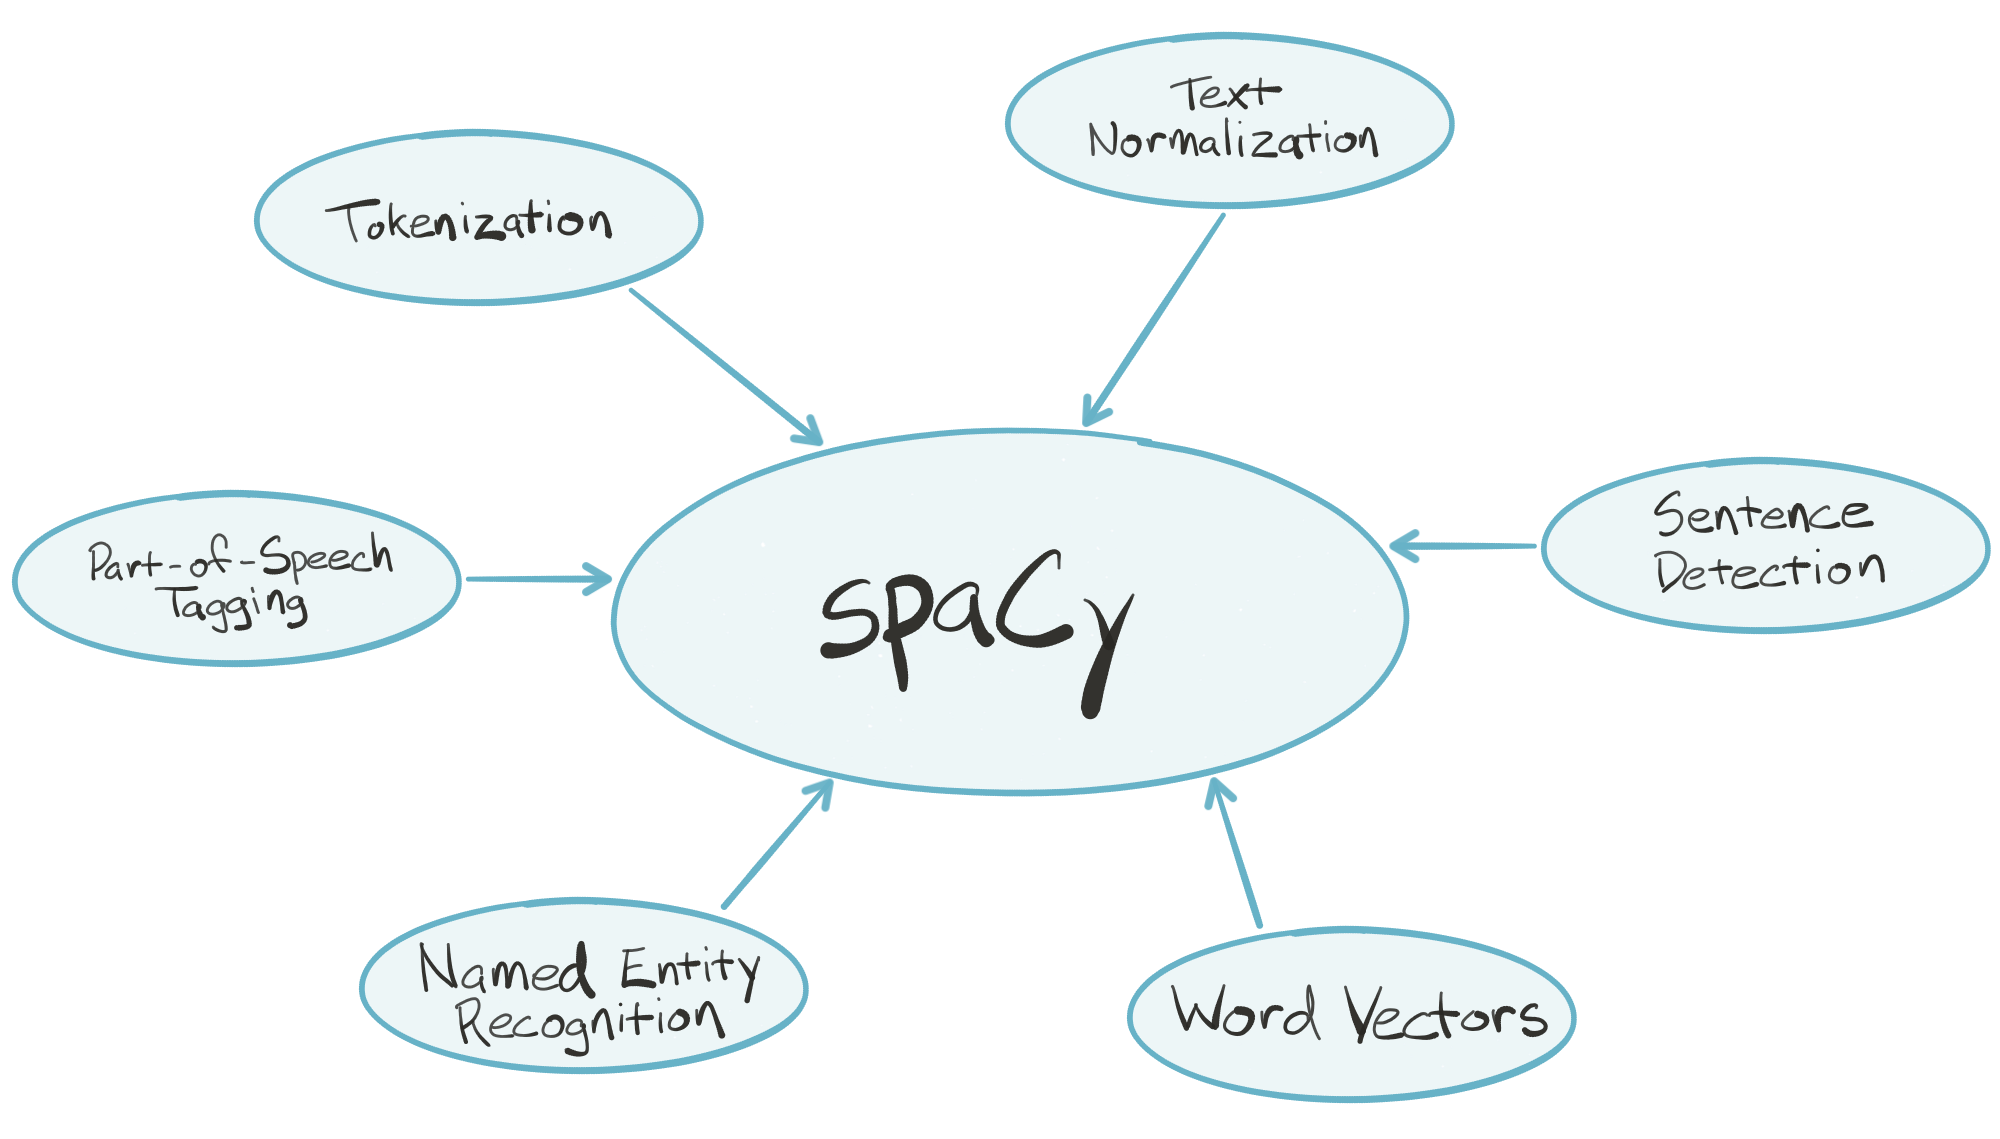

spaCy é uma biblioteca de processamento de linguagem natural -  **Natural Language Processing (NLP)** de nível industrial para Python. O objetivo da spaCy é retirar os recentes avanços no processamento de linguagem natural dos documentos de pesquisa e colocá-los nas mãos dos usuários para criar software de produção.

O spaCy lida com muitas tarefas comumente associadas à construção de um pipeline de processamento de linguagem natural de ponta a ponta:

* Tokenização
* Normalização de texto, como minúsculas, lematização e análise de forma de token
* Marcação de parte da fala
* Análise de dependência sintática
* Detecção de limite de sentença
* Reconhecimento e anotação de entidade nomeada

Seguindo a tradição "pilhas inclusas" do Python, o spaCy contém dados e modelos internos que você pode usar imediatamente para processar texto de idioma inglês de uso geral:

* Grande vocabulário em inglês, incluindo listas de palavras irrelevantes
* "Probabilidades" de Tokens
* Vetores de palavras

<font color='green'> Nota do Tradutor: O spaCy também tem o Português, entretanto os modelos não são tão avançados quanto para o Inglês. </font>

spaCy é escrito em Cython otimizado, o que significa que é rápido. De acordo com algumas fontes independentes, é o analisador sintático mais rápido disponível em qualquer idioma. As principais partes do pipeline de análise spaCy são escritas em C puro, permitindo multithreading eficiente (ou seja, spaCy pode liberar o GIL).

<font color='red'> Atenção!: Se você ainda não tiver instalado execute as linhas abaixo, caso contrário apenas ignore </font>. Para transforma a célula em código novamente, selecione a celula depois click no menu Cell> Cell Type> Code, ou selecione a celula e aperte Y.

## 3.1 Inciando o Spacy

In [6]:
import spacy
from spacy import displacy
import pandas as pd
import itertools as it

nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('en_core_web_md') No tutorial do Harrison era esse mas parece que foi alterado no spaCy

Vamos pegar uma amostra de avaliação para brincar.

In [7]:
review_num = 754601
# atenção este numero pode trazer uma avaliação diferente da apresenta aqui, 
# aconteceu essa diferença entre o tutorial do Harrison e este

with open(review_txt_filepath, encoding='utf-8') as f:
    sample_review = list(it.islice(f, review_num, review_num+1))[0]
    sample_review = sample_review.replace('\\n', '\n')
        
print(sample_review)

Stopped in here for an after work drink and some ribs. First impression when I walk in is the place is dirty. Patio is niceand modern but somebody should be cleaning the tables better.
I had the Rib and Wing combo which was ok. I cannot complain but I cannot tell you that I was impressed either. It was supposed to be the special of the day but it just looked like they cut the price and the portion size. Fries were good though!
The key is at this restaurant is the service, or should i say the lack of service. Both bartender and waitress never smile, are not very attentive and do not seem to care about being there. This is probably a result of the management/ownership lack of attentiveness. I saw the owner and he looked more like an overseer then someone who was pushing his team to succeed. 
Stay away, until the ownership understands what it means to be in the hospitality business.



------
Passe a avaliação para o spaCy, e se prepare para esperar

In [8]:
%%time
parsed_review = nlp(sample_review)

Wall time: 62.8 ms


---
... uma fração de segundo. Vamos ver o que ele estava fazendo durante este tempo

In [9]:
print(parsed_review)

Stopped in here for an after work drink and some ribs. First impression when I walk in is the place is dirty. Patio is niceand modern but somebody should be cleaning the tables better.
I had the Rib and Wing combo which was ok. I cannot complain but I cannot tell you that I was impressed either. It was supposed to be the special of the day but it just looked like they cut the price and the portion size. Fries were good though!
The key is at this restaurant is the service, or should i say the lack of service. Both bartender and waitress never smile, are not very attentive and do not seem to care about being there. This is probably a result of the management/ownership lack of attentiveness. I saw the owner and he looked more like an overseer then someone who was pushing his team to succeed. 
Stay away, until the ownership understands what it means to be in the hospitality business.



------
Parece a mesma coisa! O que aconteceu sob o capô?

E quanto à detecção e segmentação de sentenças?

In [10]:
for num, sentence in enumerate(parsed_review.sents):
    print(f'Sentence {num + 1}:')
    print(sentence)
    print('')

Sentence 1:
Stopped in here for an after work drink and some ribs.

Sentence 2:
First impression when I walk in is the place is dirty.

Sentence 3:
Patio is niceand modern but somebody should be cleaning the tables better.


Sentence 4:
I had the Rib and Wing combo which was ok.

Sentence 5:
I cannot complain

Sentence 6:
but I cannot tell you that I was impressed either.

Sentence 7:
It was supposed to be the special of the day

Sentence 8:
but it just looked like they cut the price and the portion size.

Sentence 9:
Fries were good though!


Sentence 10:
The key is at this restaurant is the service, or should i say the lack of service.

Sentence 11:
Both bartender and waitress never smile, are not very attentive and do not seem to care about being there.

Sentence 12:
This is probably a result of the management/ownership lack of attentiveness.

Sentence 13:
I saw the owner and he looked more like an overseer then someone who was pushing his team to succeed. 


Sentence 14:
Stay away,

----
E a normalização de texto, como lematização e análise de forma de token?

In [11]:
token_text = [token.orth_ for token in parsed_review]
token_lemma = [token.lemma_ for token in parsed_review]
token_shape = [token.shape_ for token in parsed_review]

pd.DataFrame(
    zip(token_text, token_lemma, token_shape),
    columns=['token_text', 'token_lemma', 'token_shape']
    )

,token_text,token_lemma,token_shape
0,Stopped,stop,Xxxxx
1,in,in,xx
2,here,here,xxxx
3,for,for,xxx
4,an,an,xx
...,...,...,...
184,the,the,xxx
185,hospitality,hospitality,xxxx
186,business,business,xxxx
187,.,.,.


----
E sobre *part of speech tagging?*

In [12]:
token_pos = [token.pos_ for token in parsed_review]

pd.DataFrame(
    zip(token_text, token_pos),
    columns=['token_text', 'part_of_speech']
    )

,token_text,part_of_speech
0,Stopped,VERB
1,in,ADV
2,here,ADV
3,for,ADP
4,an,DET
...,...,...
184,the,DET
185,hospitality,NOUN
186,business,NOUN
187,.,PUNCT


---
E a detecção de entidades?

In [13]:
displacy.render(parsed_review, style="ent",jupyter=True)

In [14]:
for num, entity in enumerate(parsed_review.ents):
    print(f'Entity {num + 1}:', entity, '-', entity.label_)
    print('')

Entity 1: First - ORDINAL

Entity 2: Rib - LOC

Entity 3: the day - DATE



<font color='green'> Nota do Tradutor: Parece que nem tudo é perfeito no mundo. O spaCy reconheceu "Rib" como uma localização sendo que é um prato "costela"</font>

---
E a análise de entidade no nível de token?

In [15]:
token_entity_type = [token.ent_type_ for token in parsed_review]
token_entity_iob = [token.ent_iob_ for token in parsed_review]

pd.DataFrame(
    zip(token_text, token_entity_type, token_entity_iob),
    columns=['token_text', 'entity_type', 'inside_outside_begin']
    )

,token_text,entity_type,inside_outside_begin
0,Stopped,,O
1,in,,O
2,here,,O
3,for,,O
4,an,,O
...,...,...,...
184,the,,O
185,hospitality,,O
186,business,,O
187,.,,O


---
E uma variedade de outros atributos no nível de token, como a frequência relativa de tokens, e se um token corresponde ou não a alguma dessas categorias?

* stopword
* pontuação
* espaço em branco
* representa um número
* se o token está ou não incluído no vocabulário padrão do spaCy?

In [16]:
token_attributes = [
        (
        token.orth_,
        token.prob,
        token.is_stop,
        token.is_punct,
        token.is_space,
        token.like_num,
        token.is_oov
        ) for token in parsed_review
    ]

df = pd.DataFrame(
    token_attributes,
    columns=[
        'text',
        'log_probability',
        'stop?',
        'punctuation?',
        'whitespace?',
        'number?',
        'out of vocab.?'
        ]
    )

df.loc[:, 'stop?':'out of vocab.?'] = (
    df
    .loc[:, 'stop?':'out of vocab.?']
    .applymap(lambda x: 'Yes' if x else '')
    )
                                               
df

,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,Stopped,-20.0,,,,,Yes
1,in,-20.0,Yes,,,,Yes
2,here,-20.0,Yes,,,,Yes
3,for,-20.0,Yes,,,,Yes
4,an,-20.0,Yes,,,,Yes
...,...,...,...,...,...,...,...
184,the,-20.0,Yes,,,,Yes
185,hospitality,-20.0,,,,,Yes
186,business,-20.0,,,,,Yes
187,.,-20.0,,Yes,,,Yes


Se o texto que você processar é Inglês de uso geral (i.e., não é de um domínio específico, como literatura médica), O spaCy está pronto para o uso imediato.

Penso que acabará por se tornar uma parte essencial do ecossistema de ciência de dados Python - fará pela computação em linguagem natural o que outras grandes bibliotecas fizeram para a computação numérica.

# Phrase Modeling 

A *Phrase Modeling* é outra abordagem para aprender combinações de tokens que juntos representam conceitos significativos de várias palavras. Podemos desenvolver *phrase model* repetindo as palavras em nossas análises e procurando por palavras que co-ocorram (ou seja, aparecem uma após a outra) juntas com muito mais frequência do que você esperaria que elas sugissem por acaso. A fórmula para nossos *phrase models* que usaremos para determinar se dois token $A$ and $B$ constitute a phrase is:



$$\frac{count(A\ B) - count_{min}}{count(A) * count(B)} * N > threshold$$

...where:

* $count(A)$ é o número de vezes que o token $A$ aparece no corpus
* $count(B)$ é o número de vezes que o token $B$ aparece no corpus
* $count(A\ B)$ é o número de vezes que os tokens $A\ B$ aparecem no corpus na ordem exata
* $N$ é o tamanho total do vocabulário do corpus
* $count_{min}$  é um parâmetro definido pelo usuário para asegurar que a frase aceita ocorre ao menos uma quantidade mínima de vezes
* $threshold$ é um parâmetro definido pelo usuário para controlar a intensidade que deve ter a relação entre os dois tokes para que seja aceita como um *phrase model*


Uma vez que nosso modelo de frase foi treinado em nosso corpus, podemos aplicá-lo ao novo texto. Quando nosso modelo encontra dois tokens no novo texto que é identificado como uma frase, ele mescla os dois em um único novo token.

A *phrase modeling* é superficialmente semelhante à detecção de entidades nomeadas, na medida em que você esperaria que as entidades nomeadas se tornassem frases no modelo (para que new york se tornasse new_york). Mas você também espera que expressões com várias palavras que representem conceitos comuns, mas que não sejam entidades nomeadas especificamente (como happy hour), também se tornem frases no modelo.

Nós nos voltamos para a indispensável biblioteca [gensim](https://radimrehurek.com/gensim/index.html) para nos ajudar na modelagem de frases - a classe [Phrases](https://radimrehurek.com/gensim/models/phrases.html) em particular.

<font color='red'> Atenção!: Se você ainda não tiver instalado execute as linhas abaixo, caso contrário apenas ignore </font>. Para transforma a célula em código novamente, selecione a celula depois click no menu Cell> Cell Type> Code, ou selecione a celula e aperte Y.

In [17]:
from gensim.models.phrases import Phrases, Phraser
from gensim.models.word2vec import LineSentence

unable to import 'smart_open.gcs', disabling that module


Enquanto realizamos a modelagem de frases, faremos algumas transformações de dados iterativas ao mesmo tempo. Nosso roteiro para a preparação de dados inclui:

* Segmente o texto de avaliações completas em frases e normalize o texto
* Modelagem de frase de primeira ordem $ \rightarrow $ aplica o modelo de frase de primeira ordem para transformar sentenças
* Modelagem de frase de segunda ordem $ \rightarrow $ aplica o modelo de frase de segunda ordem para transformar sentenças
* Aplicar normalização de texto e modelo de frase de segunda ordem ao texto de revisões completas
* Usaremos esses dados transformados como entrada para algumas abordagens de modelagem de nível superior nas seções a seguir.

Primeiro, vamos definir algumas funções auxiliares que usaremos para normalização de texto.

In [18]:
def punct_space(token):
    """
    funcao de auxilio para eliminar tokens
    que sao so pontuacao e espaco em branco
    """
    
    return token.is_punct or token.is_space

def pronoun_lemmatize(token):
    """
    funcao de auxilio para preservar pronomes e tansforma em minuscula enquanto faz lematizacao
    """
    
    if token.lemma_ == '-PRON-':
        return token.lower_
    
    else:
        return token.lemma_.lower()

def line_review(filename):
    """
    funcao geradora para ler avaliacoes do arquivo 
    e desmarque as quebras de linha originais no texto
    """
    
    with open(filename,encoding='utf-8') as f:
        for review in f:
            yield review.replace('\\n', '\n')

Em seguida, usaremos o spaCy para:

* Fazer iterações sobre as avaliações no arquivo review_txt_all.txt que criamos antes
* Segmentar as revisões em frases individuais
* Remover pontuação e excesso de espaço em branco
* Lematização do texto

... e faça isso com o benefício do multiprocessamento, graças à função nlp.pipe() do spaCy. Escreveremos esses dados novamente em um novo arquivo (sentence_lemmatized_all), com uma sentença normalizada por linha. Durante o processo, também pré-processaremos o texto das avaliações completas, não segmentadas por sentenças, da mesma maneira e salvaremos em um arquivo chamado review_lemmatized_all.

Usaremos todos esses dados posteriormente para aprendizagem dos modelos.

In [19]:
review_lemmatized_filepath = os.path.join(scratch_directory, 'review_lemmatized_all.txt')
sentence_lemmatized_filepath = os.path.join(scratch_directory, 'sentence_lemmatized_all.txt')

⚠️ **<font color='red'>Atenção: se você deseja executar novamente o pré-processamento de texto, a célula seguinte demorou cerca de 18 horas para executar o sentenciamento e lematização de todo o texto de revisão de restaurante no conjunto de dados do Yelp.</font>**

In [20]:
# Isso vai demorar um bom tempo- coloque execute = True
# se você quiser executar estes dados por você mesmo

execute = False

if execute:

    with open(review_lemmatized_filepath, 'w',encoding='utf-8') as review_file:
        with open(sentence_lemmatized_filepath, 'w',encoding='utf-8') as sentence_file:
            
            pipe = nlp.pipe(
                line_review(review_txt_filepath),
                batch_size=10000,
                n_threads=8
                )
            
            for parsed_review in pipe:
                
                # Lematização dos textos das avaliações, removendo pontuação e espaços em branco
                lemmatized_review = ' '.join([
                    pronoun_lemmatize(token)
                    for token in parsed_review
                    if not punct_space(token)
                    ])
                
                # salva o texto de cada avaliação lematixada como uma nova linha no arquivo
                review_file.write(lemmatized_review + '\n')
        
                # Faz iteração sobre cada sentença da avaliação
                for sent in parsed_review.sents:
                    
                    # Lematização do texto de cada sentença
                    lemmatized_sentence = ' '.join([
                        pronoun_lemmatize(token)
                        for token in sent
                        if not punct_space(token)
                        ])
                    
                    # salva o texto de cada lemtização como uma linha no arquivo
                    sentence_file.write(lemmatized_sentence + '\n')

Se seus dados estão organizados como o nosso arquivo sentença_lemmatized_all agora é - um grande arquivo de texto com um documento / sentença por linha - a classe LineSentence do gensim fornece um iterador conveniente para trabalhar com outros componentes do gensim. Ele transmite os documentos / frases do disco, para que você nunca precise reter o corpus inteiro na RAM de uma só vez. Isso permite que você dimensione seu pipeline de modelagem para corpora potencialmente muito grande.

In [21]:
sentences_unigrams = LineSentence(sentence_lemmatized_filepath)

Vamos dar uma olhada em algumas frases de exemplo em nosso novo arquivo transformado.

In [22]:
for sentence_unigrams in it.islice(sentences_unigrams, 80, 100):
    print(' '.join(sentence_unigrams))
    print('')

we also order one sushi roll because we have to try at least one

and we love it

definitely will be come back to try more thing

place be really small and there be only one server but we come when it be really slow and the service be pretty fast

all in all very happy we get to try this place out

10 p.m. on a super bowl sunday

and they be already close

weak no wonder the hard rock be die off

a close friend be in town and so instead of take him to a more well establish joint we decide to try the newly open choolah

we be not disappointed

i be a bit of an amateur chef myself and consider my palate to be fairly sophisticated when it come to all kind of south asian cuisine

this be not authentic indian food we do not have rice and salad bowl but it be good wholesome high quality indian food

i order a bowl of rice yellow daal and the koftas meatball

the daal be perfect the way daal should be cook

the koftas be a little bland for my taste but otherwise not bad

soft and the right te

----
Em seguida, aprenderemos um modelo de frase que vinculará palavras individuais a frases de duas palavras. Esperamos que palavras que juntas representem um conceito específico, como "pin ball", sejam vinculadas para formar um novo token único: "pin_ball".

In [23]:
bigram_model_filepath = os.path.join(scratch_directory, 'bigram_phrase_model')

⚠️ **<font color='red'>Atenção: se você deseja executar o processamento de texto, a célula seguinte demorou cerca de 12 minutos  para executar.</font>**

In [24]:
# isso leva um bom tempo executando - set execute = True
# se você quiser executar por você mesmo.

execute = False

if execute:

    bigram_phrases = Phrases(sentences_unigrams)
    
    # Transforma as frases em objetos "Phraser",
    # o que é otimizado para acelerar a memória
    bigram_phrases = Phraser(bigram_phrases)
    bigram_phrases.save(bigram_model_filepath)

In [25]:
# carrega do disco o modelo finalizado
bigram_phrases = Phraser.load(bigram_model_filepath)

Agora que temos um modelo de frase treinado para pares de palavras, vamos aplicá-lo aos dados das frases de revisão e explorar os resultados.

In [26]:
sentences_bigrams_filepath = os.path.join(scratch_directory, 'sentence_bigram_phrases_all.txt')

⚠️ **<font color='red'>Atenção: se você deseja executar o processamento de texto, a célula seguinte demorou cerca de 17 minutos  para executar.</font>**

In [27]:
# isso leva um bom tempo executando - set execute = True
# se você quiser executar por você mesmo.

execute = False

if execute:

    with open(sentences_bigrams_filepath, 'w',encoding='utf-8') as f:
        
        for sentence_unigrams in sentences_unigrams:
            
            sentence_bigrams = ' '.join(bigram_phrases[sentence_unigrams])
            
            f.write(sentence_bigrams + '\n')

In [28]:
sentences_bigrams = LineSentence(sentences_bigrams_filepath)

In [29]:
for sentence_bigrams in it.islice(sentences_bigrams, 80, 100):
    print(' '.join(sentence_bigrams))
    print('')

we also order one sushi roll because we have to try at least one

and we love it

definitely will be come back to try more thing

place be really small and there be only one server but we come when it be really slow and the service be pretty fast

all in all very happy we get to try this place out

10 p.m. on a super bowl sunday

and they be already close

weak no wonder the hard rock be die off

a close friend be in town and so instead of take him to a more well establish joint we decide to try the newly_open choolah

we be not disappointed

i be a bit of an amateur chef myself and consider my palate to be fairly sophisticated when it come to all kind of south asian cuisine

this be not authentic indian food we do not have rice and salad bowl but it be good wholesome high quality indian food

i order a bowl of rice yellow_daal and the koftas meatball

the daal be perfect the way daal should be cook

the koftas be a little bland for my taste but otherwise not bad

soft and the right te

Parece que a frase modelagem funcionou! Agora vemos frases de duas palavras, como "pin_ball" e "saturday_morning", vinculadas no texto como um único token. Em seguida, treinaremos um modelo de frase de segunda ordem. Aplicaremos o modelo de frase de segunda ordem sobre os dados já transformados, para que combinações incompletas de palavras como "ms_pac man" sejam totalmente associadas a "ms_pac_man".

In [30]:
trigram_model_filepath = os.path.join(scratch_directory, 'trigram_phrase_model')

In [31]:
# isso leva um bom tempo executando - set execute = True
# se você quiser executar por você mesmo.

execute = False

if execute:

    trigram_phrases = Phrases(sentences_bigrams)
    
    # Transforma as frases em objetos "Phraser",
    # o que é otimizado para acelerar a memória
    trigram_phrases = Phraser(trigram_phrases)
    trigram_phrases.save(trigram_model_filepath)

In [32]:
# carrega do disco o modelo finalizado
trigram_phrases = Phraser.load(trigram_model_filepath)

Aplicaremos nosso modelo de frase de segunda ordem treinado em nossas frases transformadas de primeira ordem, escreveremos os resultados em um novo arquivo e exploraremos algumas das frases transformadas de segunda ordem.

In [33]:
sentences_trigrams_filepath = os.path.join(scratch_directory, 'sentence_trigram_phrases_all.txt')

In [34]:
# isso leva um bom tempo executando - set execute = True
# se você quiser executar por você mesmo.

execute = False

if execute:

    with open(sentences_trigrams_filepath, 'w',encoding='utf-8') as f:
        
        for sentence_bigrams in sentences_bigrams:
            
            sentence_trigrams = ' '.join(trigram_phrases[sentence_bigrams])
            
            f.write(sentence_trigrams + '\n')

In [35]:
sentences_trigrams = LineSentence(sentences_trigrams_filepath)

In [36]:
for sentence_trigrams in it.islice(sentences_trigrams, 60, 70):
    print(' '.join(sentence_trigrams))
    print('')

and i hope they continue to do well

order

in delivery review

i discover this place from the front_desk of the airport hotel and they recommend it highly

i call to place my order for delivery to my room

they be very accommodating

won

ton soup nice broth and tender win_ton

chicken with diced vegetable and cashew again fresh vegetable be use and good sized piece of chicken

crispy beef much like a ginger beef nice serving of beef with a sweet chilli sauce



---
Parece que o modelo de frase de segunda ordem foi bem-sucedido. Agora estamos vendo frases de três palavras, como "pin_ball_machine" e "ms_pac_man".

A etapa final do nosso processo de preparação de texto volta ao texto completo das revisões. Vamos executar o texto completo das revisões por meio de um pipeline que aplica nossa normalização de texto e modelos de frase.

Além disso, removeremos as stopwords  neste momento. As stopwords são palavras muito comuns, como 'a', 'the', e assim por diante, que desempenham funções funcionais na linguagem natural, mas geralmente não contribuem para o significado geral do texto. A filtragem de palavras irrelevantes é um procedimento comum que permite que as técnicas de modelagem de PNL de nível superior se concentrem nas palavras que carregam mais peso semântico.

Por fim, escreveremos o texto transformado em um novo arquivo, com uma revisão por linha.

In [37]:
review_trigrams_filepath = os.path.join(scratch_directory, 'review_trigrams_all.txt')

⚠️ **<font color='red'>Atenção: se você deseja executar o processamento de texto, a célula seguinte demorou cerca de 30 minutos  para executar.</font>**

In [38]:
# isso leva um bom tempo executando - set execute = True
# se você quiser executar por você mesmo.

execute = False

if execute:
    
    reviews_lemmatized = LineSentence(review_lemmatized_filepath)

    with open(review_trigrams_filepath, 'w',encoding='utf-8') as f:
        
        for review_unigrams in reviews_lemmatized:
                        
            # aplica modelos de frase de primeira e segunda ordem
            review_bigrams = bigram_phrases[review_unigrams]
            review_trigrams = trigram_phrases[review_bigrams]

            # remove qualquer stopword restante
            review_trigrams = [
                term
                for term in review_trigrams
                if term not in nlp.Defaults.stop_words
                ]

            # escreve uma avaliação tranformada como uma linha em um arquivo novo
            review_trigrams = ' '.join(review_trigrams)
            f.write(review_trigrams + '\n')

Vamos visualizar os resultados. Vamos pegar uma revisão do arquivo com o texto original não transformado, pegar a mesma revisão do arquivo com o texto normalizado e transformado e comparar as duas.

In [39]:
review_num = 20

print('Original:' + '\n')

for review in it.islice(line_review(review_txt_filepath), review_num, review_num+1):
    print(review)

print('----' + '\n')
print('Transformed:' + '\n')

with open(review_trigrams_filepath) as f:
    for review in it.islice(f, review_num, review_num+1):
        print(review)

Original:

This was our choice, by default, for New Year's Eve dinner this year. See, we chose not to make reservations, but instead just wing it and see where we could get in. They had some early dining availability, so we jumped on it. Their special New Year's "Paint the Town Gold" menu did not disappoint.

Located in the beautiful Mandalay Bay restaurant row, Kumi is a gorgeous display of style and food artistry. Every course was surprisingly delicious, and plated interestingly.

Service was very good, seriously on point. Right up until the dessert course...after 30 minutes of waiting for it, we finally requested the check as we had an event to get to. One of our attendants felt bad and offered to quickly grab it for us but we were in danger of being late so we opted not to take him up on it. 

It's a beautiful, albeit very pricey experience for dinner. We would return for special occasions only.

----

Transformed:

choice default new year eve dinner year choose reservation instead

# Modelagem de Tópicos com Alocação Latente de Dirichlet (LDA)

A modelagem de tópicos é uma família de técnicas que podem ser usadas para descrever e resumir os documentos em um corpus de acordo com um conjunto de "tópicos" latentes. Para esta demonstração, usaremos Alocação Latente de Dirichlet ou LDA, uma abordagem popular para modelagem de tópicos.

Em muitos aplicativos convencionais de NLP, os documentos são representados como uma mistura dos tokens individuais (palavras e frases) que eles contêm. Em outras palavras, um documento é representado como um vetor de contagens de token. Existem duas camadas neste modelo - documentos e tokens - e o tamanho ou dimensionalidade dos vetores de documentos é o número de tokens no vocabulário do corpus. Essa abordagem tem várias desvantagens:

* Os vetores de documentos tendem a ser grandes (uma dimensão para cada token $ \ Rightarrow $ lotes de dimensões)
* Eles também tendem a ser muito escassos. Qualquer documento contém apenas uma pequena fração de todos os tokens no vocabulário; portanto, a maioria dos valores no vetor de token do documento é 0.
* As dimensões são totalmente independentes uma da outra - não há senso de conexão entre tokens relacionados, como 'faca' e 'garfo'.

A LDA injeta uma terceira camada nesse modelo conceitual. Os documentos são representados como uma mistura de um número predefinido de **tópicos**, e os tópicos são representados como uma mistura dos tokens individuais no vocabulário. O número de tópicos é um modelo hiperparâmetro selecionado pelo profissional. A LDA assume previamente que as misturas (documento, tópico) e (tópico, token) seguem as distribuições de probabilidade [Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_distribution). Essa suposição incentiva os documentos a consistirem principalmente de um punhado de tópicos, e os tópicos consistirem principalmente de um conjunto modesto de tokens.

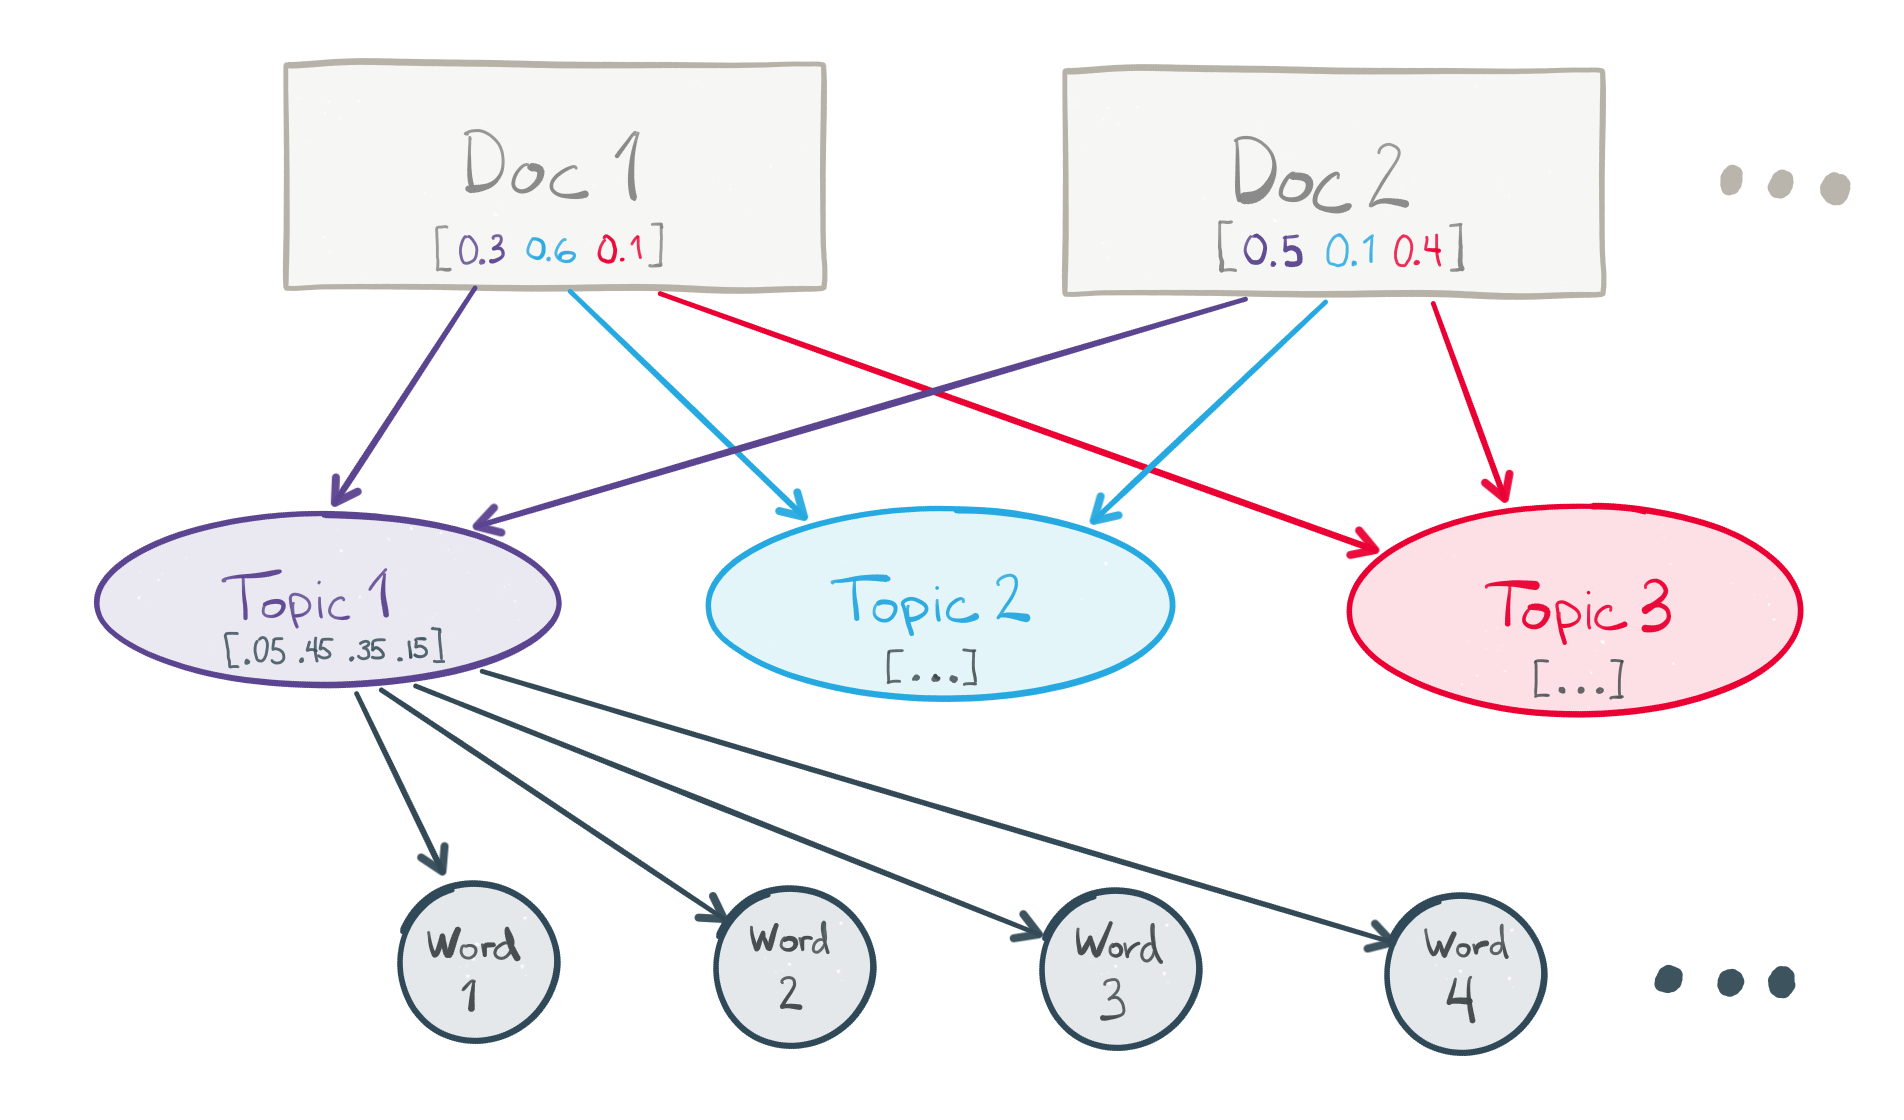

LDA é totalmente não supervisionado. Os tópicos são "descobertos" automaticamente a partir dos dados, tentando maximizar a probabilidade de observação dos documentos em seu corpus, considerando as premissas de modelagem. Espera-se que eles capturem alguma estrutura e organização latentes nos documentos e geralmente tenham uma interpretação humana significativa para pessoas familiarizadas com o material em questão.

Voltaremos novamente ao gensim para ajudar na preparação e modelagem de dados. Em particular, a gensim oferece uma implementação paralela de alto desempenho da LDA com sua classe [LdaMulticore](https://radimrehurek.com/gensim/models/ldamulticore.html).

<font color='red'> Atenção!: Se você ainda não tiver instalado execute as linhas abaixo, caso contrário apenas ignore </font>. Para transforma a célula em código novamente, selecione a celula depois click no menu Cell> Cell Type> Code, ou selecione a celula e aperte Y.

In [40]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
import pickle

O primeiro passo para criar um modelo de LDA é aprender o vocabulário completo do corpus a ser modelado. Usaremos a classe Dictionary do gensim para isso.

In [41]:
dictionary_filepath = os.path.join(scratch_directory, 'trigram_dict_all.dict')

In [42]:
# isso leva um bom tempo executando - set execute = True
# se você quiser executar por você mesmo.

execute = False

if execute:

    reviews_trigrams = LineSentence(review_trigrams_filepath)

    #Aprende o dicionario fazendo a interação sobre as avaliações
    dictionary_trigrams = Dictionary(reviews_trigrams)
    
    # filtra os tokens que são muito raros ou muito comuns para o dicionaráio
    # (filter_extremes) redesigna ids inteiras (compactify)
    dictionary_trigrams.filter_extremes(no_below=20, no_above=0.4)
    dictionary_trigrams.compactify()

    dictionary_trigrams.save(dictionary_filepath)

In [43]:
# carrega o dicionário final do disco
dictionary_trigrams = Dictionary.load(dictionary_filepath)

Como muitas técnicas de PNL, o LDA usa uma suposição simplificadora, conhecida como modelo de saco de palavras ([bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model)). No modelo de saco de palavras, um documento é representado pela contagem de termos distintos que ocorrem nele. Informações adicionais, como ordem das palavras, são descartadas.

Usando o gensim Dictionary, aprendemos a gerar uma representação de palavras para cada revisão. A função trigram_bow_generator implementa isso. Salvaremos as bag of words resultantes das avaliações como uma matriz.

No código a seguir, "bag of words" é abreviado como bow.

In [44]:
bow_corpus_filepath = os.path.join(scratch_directory, 'bow_trigrams_corpus_all.mm')

In [45]:
def bow_generator(filepath):
    """
    generator function to read reviews from a file
    and yield a bag-of-words representation
    """
    
    for review in LineSentence(filepath):
        yield dictionary_trigrams.doc2bow(review)

⚠️ **<font color='red'>Atenção: se você deseja executar o processamento de texto, a célula seguinte demorou cerca de 5 minutos  para executar.</font>**

In [46]:
# isso leva um bom tempo executando - set execute = True
# se você quiser executar por você mesmo.

execute = False

if execute:

    # gera representações bag-of-words representations para
    # todas as revisçoes e as salva como uma matriz
    MmCorpus.serialize(
        bow_corpus_filepath,
        bow_generator(review_trigrams_filepath)
        )

In [47]:
# carrega o dicionário final do disco
trigram_bow_corpus = MmCorpus(bow_corpus_filepath)

Com o corpus bag-of-words, finalmente estamos prontos para aprender nosso modelo de tópico com as avaliações. Simplesmente precisamos passar a matriz de palavras e o Dicionário das etapas anteriores para o LdaMulticore como entradas, juntamente com o número de tópicos que o modelo deve aprender. Para esta demonstração, estamos solicitando 50 tópicos.

In [48]:
lda_model_filepath = os.path.join(scratch_directory, 'lda_model_all')

⚠️ **<font color='red'>Atenção: se você deseja executar o processamento de texto, a célula seguinte demorou cerca de 10 minutos  para executar.</font>**

In [49]:
# isso leva um bom tempo executando - set execute = True
# se você treinar o LDA você mesmo.

execute = False

if execute:

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        # workers => define o paralelismo e deve ser definido como seu número de núcleos físicos menos um
        lda = LdaMulticore(
            trigram_bow_corpus,
            num_topics=50,
            id2word=dictionary_trigrams,
            workers=7
            )
    
    lda.save(lda_model_filepath)

In [50]:
# carrega o modelo LDA final do disco
lda = LdaMulticore.load(lda_model_filepath)

Nosso modelo de tópico agora está treinado e pronto para uso! Como cada tópico é representado como uma mistura de tokens, é possível inspecionar manualmente quais tokens foram agrupados em quais tópicos para tentar entender os padrões que o modelo descobriu nos dados.

In [51]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print(f'{"term":20} {"frequency"}' + '\n')

    for term, frequency in lda.show_topic(topic_number, topn=25):
        print(f'{term:20} {round(frequency, 3):.3f}')

In [52]:
explore_topic(topic_number=7)

term                 frequency

order                0.070
ask                  0.033
tell                 0.031
manager              0.025
come                 0.019
time                 0.014
receive              0.011
meal                 0.011
want                 0.010
wrong                0.009
offer                0.008
bring                0.008
eat                  0.008
leave                0.007
send                 0.007
check                0.007
know                 0.007
pay                  0.007
experience           0.006
later                0.006
issue                0.006
server               0.006
restaurant           0.006
service              0.006
waiter               0.006


O primeiro tópico tem fortes associações com palavras como burger, fry, cheese, além de algumas palavras mais genéricas. Você pode chamar isso de tópico de burger & fries!

É possível examinar e examinar cada tópico da mesma maneira e tentar atribuir um rótulo interpretável pelo homem que capte a essência de cada um. Eu testei todos os 50 tópicos abaixo.

In [61]:
topic_names = {
    0: 'burger & fries',
    1: 'nightlife',
    2: 'coffeeshop',
    3: 'cleanliness',
    4: 'restaurant',
    5: 'customer service',
    6: 'italian',
    7: 'thai',
    8: 'taste',
    9: 'customer service',
    10: 'portions',
    11: 'nightlife',
    12: 'burger & fries',
    13: 'classy ambience', #
    14: 'long wait',
    15: 'chicken',
    16: 'sandwiches',
    17: 'good serivce',
    18: 'vegas hotel',
    19: 'pizza',
    20: 'salad',
    21: 'bar vibe', #
    22: 'meal experience', #
    23: 'slow service',
    24: 'brunch',
    25: 'portion sizes',
    26: 'beer, wings, sports',
    27: 'breakfast',
    28: 'miscellaneous',
    29: 'non-English',
    30: 'deli',
    31: 'barbecue',
    32: 'local business',
    33: 'miscellaneous',
    34: 'hole-in-the-wall',
    35: 'asian',
    36: 'specials',
    37: 'coffeeshop',
    38: 'prices',
    39: 'flavor & texture',
    40: 'noodles',
    41: 'canadian',
    42: 'highly recommended',
    43: 'sushi',
    44: 'ordering',
    45: 'mediterranean',
    46: 'decent value',
    47: 'cleanliness',
    48: 'lobster',
    49: 'seafood'
    }

In [53]:
LDAvis_data_filepath = os.path.join(scratch_directory, 'ldavis_prepared')

In [54]:
# this is a bit time consuming - set execute = True
# if you want to execute data prep yourself.

execute = False

if execute:

    LDAvis_prepared = pyLDAvis.gensim.prepare(
        lda,
        trigram_bow_corpus,
        dictionary_trigrams
        )

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [55]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [56]:
pyLDAvis.display(LDAvis_prepared)

## Espere, o que eu estou olhando de novo?
Existem muitas partes móveis na visualização. Aqui está um breve resumo:

* À esquerda, há um gráfico da "distância" entre todos os tópicos (rotulado como Mapa de distância intertópica)
    * O gráfico é renderizado em duas dimensões, de acordo com um algoritmo de dimensionamento multidimensional (MDS). Os tópicos geralmente semelhantes devem aparecer juntos na trama, enquanto tópicos diferentes devem aparecer distantes.
    * O tamanho relativo do círculo de um tópico no gráfico corresponde à frequência relativa do tópico no corpus.
    * Um tópico individual pode ser selecionado para uma análise mais detalhada clicando em seu círculo ou inserindo seu número na caixa "tópico selecionado" no canto superior esquerdo.
* À direita, há um gráfico de barras mostrando os principais termos.
    * Quando nenhum tópico é selecionado no gráfico à esquerda, o gráfico de barras mostra os 30 termos mais "salientes" no corpus. A saliência de um termo é uma medida de quão frequente o termo é no corpus e quão "distintivo" é na distinção entre diferentes tópicos.
    * Quando um tópico específico é selecionado, o gráfico de barras muda para mostrar os 30 termos mais "relevantes" para o tópico selecionado. A métrica de relevância é controlada pelo parâmetro $ \lambda $, que pode ser ajustado com um controle deslizante acima do gráfico de barras.
        * Definir o parâmetro $ \lambda $ próximo a 1,0 (o padrão) classificará os termos apenas de acordo com a probabilidade no tópico.
        * Definir $ \lambda $ próximo a 0,0 classificará os termos exclusivamente de acordo com sua "distinção" ou "exclusividade" no tópico - ou seja, termos que ocorrem apenas neste tópico e não em outros tópicos.
        * Definir $ \lambda $ para valores entre 0,0 e 1,0 resultará em uma classificação intermediária, ponderando a probabilidade e a exclusividade do termo de acordo.
        
* Passar o mouse sobre um termo no gráfico de barras à direita fará com que os círculos de tópicos sejam redimensionados na plotagem à esquerda, para mostrar a força do relacionamento entre os tópicos e o termo selecionado.

Uma explicação mais detalhada da visualização pyLDAvis pode ser encontrada [aqui](https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf). Infelizmente, embora os dados usados pelo gensim e pyLDAvis sejam os mesmos, eles não usam os mesmos números de identificação para tópicos. Se você precisar combinar os tópicos no objeto LdaMulticore da gensim e na visualização do pyLDAvis, precisará pesquisar os termos manualmente.

## Analisando nosso modelo de LDA
A visualização interativa que pyLDAvis produz é útil para ambos:

1. Melhor compreensão e interpretação de tópicos individuais, e
2. Melhor compreensão das relações entre os tópicos.

Para (1), você pode selecionar manualmente cada tópico para visualizar seus termos mais frequentes e/ou "relevantes", usando diferentes valores do parâmetro $ \lambda $. Isso pode ajudar quando você está tentando atribuir um nome ou "significado" humano interpretável a cada tópico.

Em (2), explorar o Gráfico de Distância Intertópica pode ajudá-lo a aprender sobre como os tópicos se relacionam entre si, incluindo a potencial estrutura de nível superior entre grupos de tópicos.

Em nossa plotagem, há uma forte divisão ao longo do eixo y, com a maioria dos tópicos na metade superior da plotagem e um tópico externo, tópico 48, na parte inferior. A inspeção do tópico externo fornece uma explicação plausível: o tópico contém muitas palavras que não estão em inglês, enquanto a maioria dos demais tópicos está em inglês. Portanto, um dos principais atributos que distinguem as revisões no conjunto de dados é o idioma delas.

Esta descoberta não é inteiramente uma surpresa. Além das cidades de língua inglesa, o conjunto de dados do Yelp inclui análises de empresas de todo o mundo, às vezes escritas em outros idiomas. Vários idiomas não são um problema para nossa demonstração, mas para um aplicativo NLP real, talvez seja necessário garantir que o texto que você está processando seja escrito em inglês (ou pelo menos marcado para o idioma) antes de repassá-lo para algum fluxo posterior. em processamento. Se esse fosse o caso, a divisão ao longo do eixo y no gráfico de tópicos alertaria você imediatamente sobre um possível problema de qualidade de dados.

Na metade superior do gráfico, existem dois grandes e distintos grupos de tópicos - vamos chamá-los de "super tópicos" - um no quadrante superior esquerdo e outro no quadrante superior direito. Esses super-tópicos se correlacionam razoavelmente bem com o padrão que notamos ao nomear os tópicos:

* O super tópico no canto superior direito tende a ser sobre comida. Ele agrupa os tópicos de hambúrguer e batatas fritas, mexicano, frutos do mar e churrasco, entre outros.
* O super tópico na parte superior esquerda tende a ser sobre outros elementos da experiência do restaurante. Ele agrupa os tópicos de cardápio e pedidos, serviço lento, vida noturna e preços, entre outros.

Portanto, além dos 50 tópicos diretos que o modelo aprendeu, nossa análise sugere um padrão de nível superior nos dados. Os revisores de restaurantes do conjunto de dados do Yelp falam sobre duas coisas principais em suas avaliações, em geral: (1) a comida e (2) sua experiência geral em restaurantes. Para esse conjunto de dados, este é um resultado muito intuitivo e provavelmente não precisamos de uma técnica de modelagem sofisticada para nos contar. Ao trabalhar com conjuntos de dados de outros domínios, no entanto, esses padrões de alto nível podem ser muito menos óbvios desde o início - e é aí que a modelagem de tópicos pode ajudar.

## Descrevendo texto com LDA

Além da exploração de dados, um dos principais usos de um modelo de LDA é fornecer uma descrição quantitativa e compacta do texto em linguagem natural. Depois de treinar um modelo de LDA, ele pode ser usado para representar texto livre como uma mistura dos tópicos que o modelo aprendeu com o corpus original. Essa mistura pode ser interpretada como uma distribuição de probabilidade entre os tópicos; portanto, a representação da LDA de um parágrafo de texto pode parecer 50% do tópico A, 20% do tópico B, 20% do tópico C e 10% do tópico D.

Para usar um modelo LDA para gerar uma representação vetorial de novo texto, você também precisará aplicar as etapas de pré-processamento de texto usadas no corpus de treinamento do modelo. Para o nosso modelo, as etapas de pré-processamento que usamos incluem:

1. Usando spaCy para remover pontuação e lematizar o texto
1. Aplicando nosso modelo de frase de primeira ordem para unir pares de palavras
1. Aplicando nosso modelo de frase de segunda ordem para unir frases mais longas
1. Removendo palavras irrelevantes
1. Criando uma representação de palavras-chave

Depois de aplicar essas etapas de pré-processamento ao novo texto, ele estará pronto para passar diretamente ao modelo para criar uma representação LDA. A função lda_description (...) executará todas essas etapas para nós, incluindo a impressão da descrição tópica resultante do texto de entrada.

In [57]:
def get_sample_review(review_number):
    """
    retrieve a particular review index
    from the reviews file and return it
    """
    
    review = next(
        it.islice(
            line_review(review_txt_filepath),
            review_number,
            review_number+1
            )
        )
    
    return review

In [62]:
def lda_description(review_text, min_topic_freq=0.05):
    """
    accept the original text of a review and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    
    # parse the review text with spaCy
    parsed_review = nlp(review_text)
    
    # lemmatize the text and remove punctuation and whitespace
    review_unigrams = [
        pronoun_lemmatize(token)
        for token in parsed_review
        if not punct_space(token)
        ]
    
    # apply the first-order and secord-order phrase models
    review_bigrams = bigram_phrases[review_unigrams]
    review_trigrams = trigram_phrases[review_bigrams]
    
    # remove any remaining stopwords
    review_trigrams = [
        term
        for term in review_trigrams
        if not term in nlp.Defaults.stop_words
        ]
    
    # create a bag-of-words representation
    review_bow = dictionary_trigrams.doc2bow(review_trigrams)
    
    # create an LDA representation
    review_lda = lda[review_bow]
    
    # sort with the most highly related topics first
    review_lda = sorted(review_lda, key=lambda topic_number_freq: -topic_number_freq[-1])
    
    for topic_number, freq in review_lda:
        if freq < min_topic_freq:
            break
            
        # print the most highly related topic names and frequencies
        print(f'{topic_names[topic_number]:25} {round(freq, 3):.3f}')

In [63]:
sample_review = get_sample_review(0)

print(sample_review)

I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!



In [64]:
lda_description(sample_review)

sushi                     0.312
bar vibe                  0.142
burger & fries            0.128
hole-in-the-wall          0.102
flavor & texture          0.099
nightlife                 0.088
noodles                   0.052


In [65]:
sample_review = get_sample_review(3)

print(sample_review)

This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I see and taste here tells me that they're using top-grade fresh ingredients. The brisket sandwich is probably my favorite... and it's the one my wife ALWAYS gets. Unlike her, I often bounce around the menu to try different things. Definitely a step up from Subway, Quiznos, Jimmy Johns, etc in my opinion. As with all of my reviews, I grade each place relative to what I perceive to be its peers - so five star compared to them.



In [66]:
lda_description(sample_review)

bar vibe                  0.212
brunch                    0.161
decent value              0.151
salad                     0.135
hole-in-the-wall          0.108
breakfast                 0.093
coffeeshop                0.079


# Incorporação de vetores de palavras com Word2Vec

Pop quiz! Você pode completar este trecho de texto?

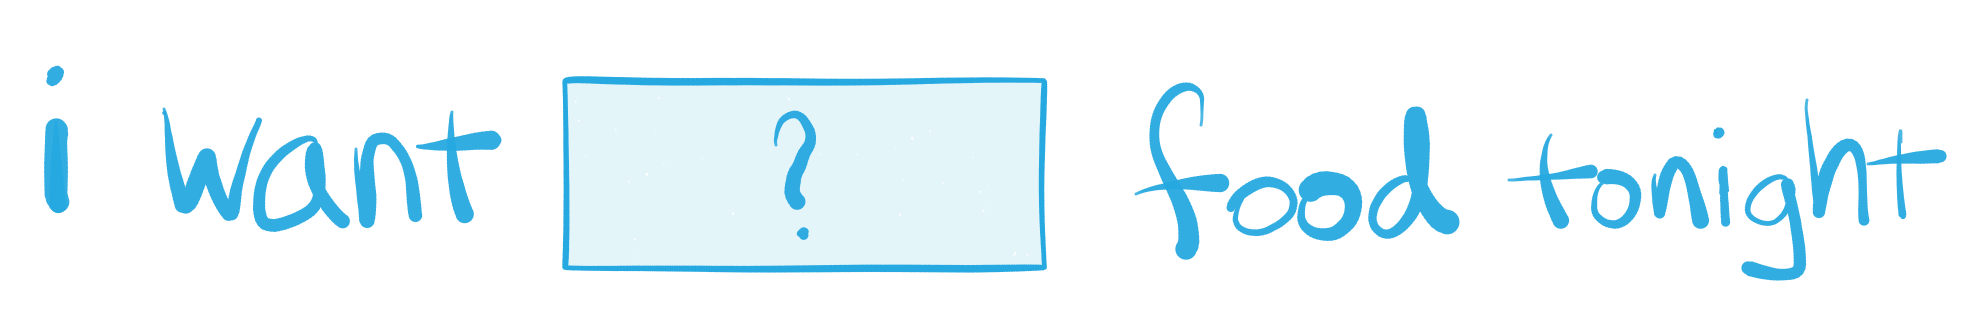


Você acabou de demonstrar o conceito principal de aprendizado de máquina por trás dos modelos de incorporação de vetores de palavras!

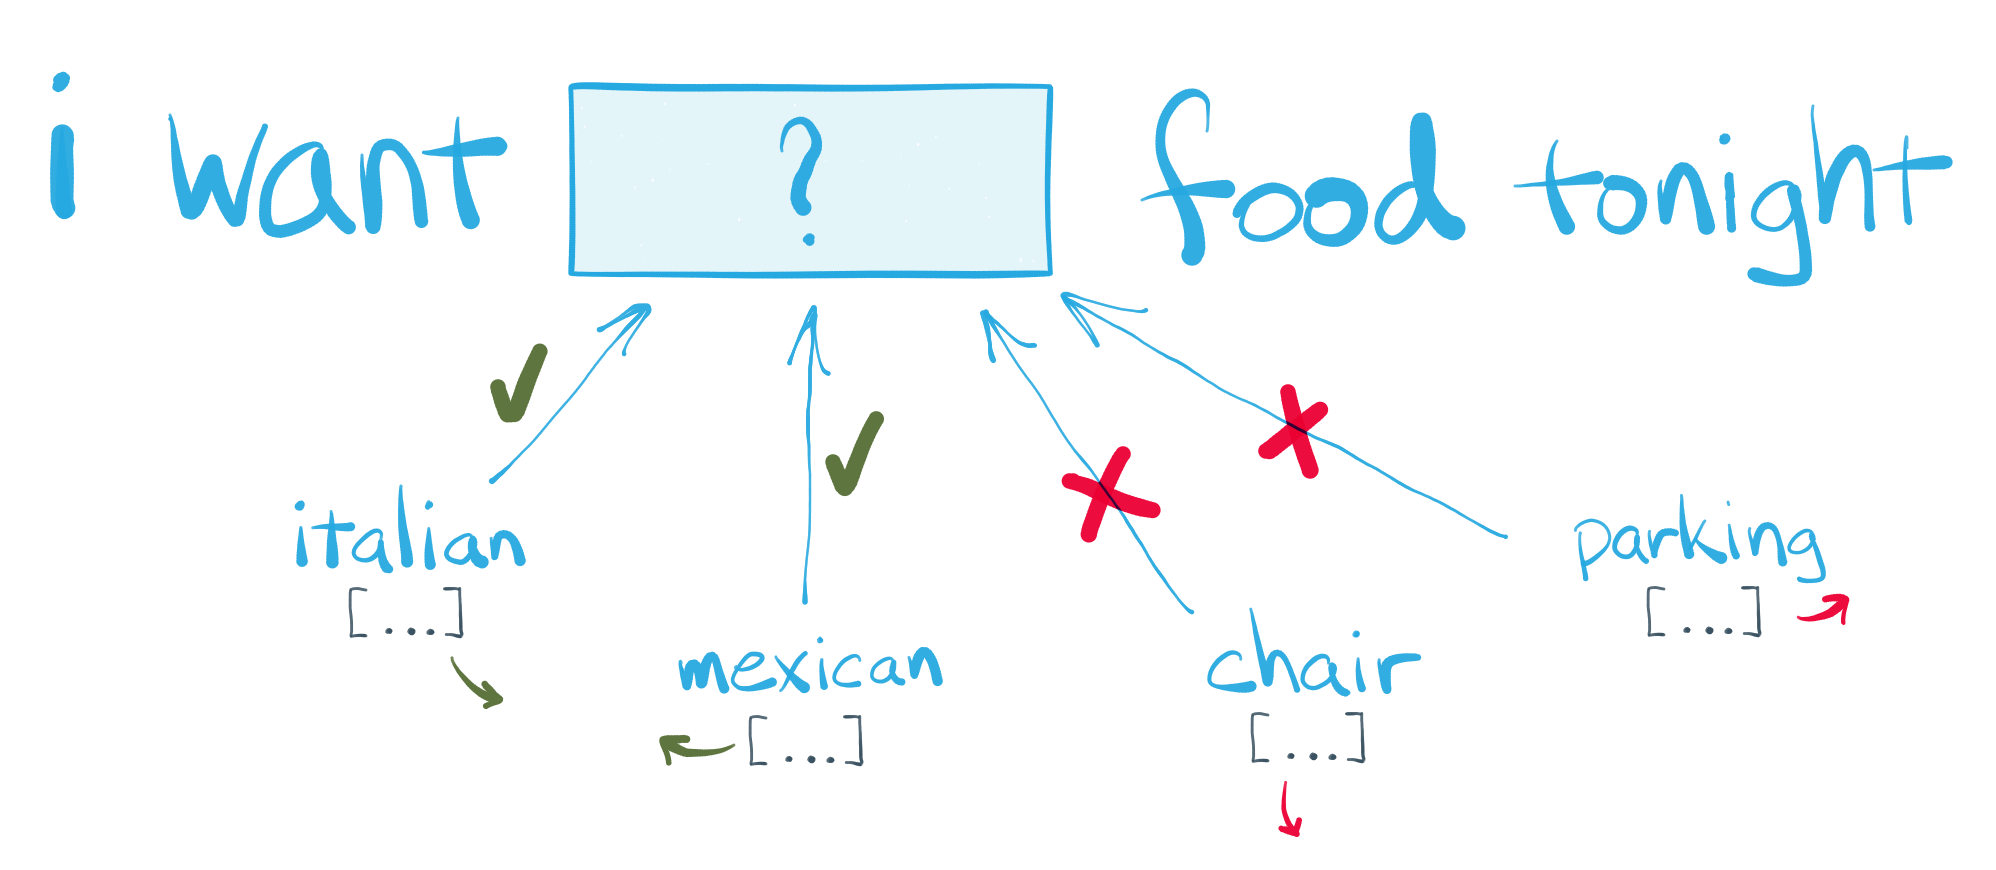

O objetivo dos modelos de incorporação de vetores de palavras, ou modelos de vetores de palavras, é aprender representações vetoriais densas e numéricas para cada termo em um vocabulário de corpus. Se o modelo for bem-sucedido, os vetores que ele aprende sobre cada termo devem codificar algumas informações sobre o significado ou conceito que o termo representa e a relação entre ele e outros termos no vocabulário. Os modelos de vetores de palavras também não são totalmente supervisionados - eles aprendem todos esses significados e relacionamentos apenas analisando o texto do corpus, sem nenhum conhecimento prévio fornecido.

Talvez o modelo de vetor de palavras mais conhecido seja o [word2vec](https://arxiv.org/pdf/1301.3781v3.pdf), originalmente proposto em 2013. A idéia geral do word2vec é, para uma dada palavra em foco, usar o contexto da palavra - ou seja, as outras palavras imediatamente antes e depois dela - para fornecer dicas sobre o que a palavra em foco pode significar. Para fazer isso, o word2vec usa uma técnica de janela deslizante, na qual considera trechos de texto com apenas alguns tokens de cada vez.

No início do processo de aprendizagem, o modelo inicializa vetores aleatórios para todos os termos no vocabulário do corpus. O modelo então desliza a janela por todos os trechos de texto no corpus, com cada palavra se alternando como a palavra de foco. Cada vez que o modelo considera um novo trecho, ele tenta aprender algumas informações sobre a palavra foco com base no contexto de em torno e "altera" as representações vetoriais das palavras de acordo. Um passe completo deslizando a janela por todo o texto do corpus é conhecido como época de treinamento. É comum treinar um modelo word2vec para várias passagens/épocas sobre o corpus. Com o tempo, o modelo reorganiza as representações vetoriais dos termos, de modo que termos que freqüentemente aparecem em contextos semelhantes tenham representações vetoriais próximas umas das outras no espaço vetorial.

Para um mergulho mais profundo no processo de aprendizado de máquina do word2vec, veja [aqui](https://arxiv.org/pdf/1411.2738v4.pdf).

O Word2vec possui vários hiperparâmetros definidos pelo usuário, incluindo:

* A dimensionalidade dos vetores. As escolhas típicas incluem algumas dezenas a várias centenas.
* A largura da janela deslizante, em tokens. Cinco é uma opção padrão comum, mas janelas mais estreitas e amplas são possíveis.
* O número de épocas de treinamento.

Por usar o word2vec em Python, o [gensim](https://rare-technologies.com/deep-learning-with-word2vec-and-gensim/) vem em socorro novamente! Ele oferece uma [implementação paralela](https://rare-technologies.com/parallelizing-word2vec-in-python/) [altamente otimizada](https://rare-technologies.com/word2vec-in-python-part-two-optimizing/) do algoritmo word2vec com sua classe [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html).

In [68]:
from gensim.models import Word2Vec

sentences_trigrams = LineSentence(sentences_trigrams_filepath)
word2vec_filepath = os.path.join(scratch_directory, 'word2vec_model_all')

Treinaremos nosso modelo word2vec usando as frases normalizadas com nossos modelos de frase aplicados. Usaremos vetores de 100 dimensões e configuraremos nosso processo de treinamento por vinte épocas.

⚠️ **<font color='red'>Atenção: se você deseja executar o processamento de texto, a célula seguinte demorou cerca de 3 horas  para executar.</font>**

In [71]:
# this is a bit time consuming - set execute = True
# if you want to train the word2vec model yourself.

execute = False

if execute:

    # initiate the model and perform the first epoch of training
    food2vec = Word2Vec(
        sentences_trigrams,
        size=100,
        window=5,
        min_count=50,
        sg=1,
        workers=7,
        iter=20
        )
    
    food2vec.save(word2vec_filepath)

In [72]:
food2vec = Word2Vec.load(word2vec_filepath)
food2vec.init_sims()

print(f'{food2vec.epochs} training epochs so far.')

20 training epochs so far.
